In [ ]:
!pip install np_utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import string
import re

In [ ]:
data = pd.read_csv('data.csv')
data.head()

Description  \
0   A 23-year-old white female presents with comp...   
1           Consult for laparoscopic gastric bypass.   
2           Consult for laparoscopic gastric bypass.   
3                             2-D M-Mode. Doppler.     
4                                 2-D Echocardiogram   

             Medical_Specialty                                Sample_Name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       Transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            Keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

In [ ]:
corp_data = data[['Transcription', 'Medical_Specialty']]
corp_data = corp_data.dropna()
corp_data.head()

Transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

             Medical_Specialty  
0         Allergy / Immunology  
1                   Bariatrics  
2                   Bariatrics  
3   Cardiovascular / Pulmonary  
4   Cardiovascular / Pulmonary

In [ ]:
corp_data = corp_data[corp_data['Transcription'].notna()]
test  = corp_data.groupby(corp_data['Medical_Specialty'])
filt_corp = test.filter(lambda x:x.shape[0] > 70)

In [ ]:
filt_corp['Medical_Specialty'] =filt_corp['Medical_Specialty'].apply(lambda x:str.strip(x))

test = filt_corp['Medical_Specialty'] == 'SOAP / Chart / Progress Notes'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Discharge Summary'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Emergency Room Reports'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Surgery'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Consult - History and Phy.'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'General Medicine'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Radiology'
filt_corp = filt_corp[~test]

test = filt_corp['Medical_Specialty'] == 'Neurosurgery'
filt_corp.loc[test, 'Medical_Specialty'] = 'Neurology'

In [ ]:
filt_corp.Medical_Specialty.value_counts()

Cardiovascular / Pulmonary    371
Orthopedic                    355
Neurology                     317
Gastroenterology              224
Urology                       156
Obstetrics / Gynecology       155
ENT - Otolaryngology           96
Hematology - Oncology          90
Ophthalmology                  83
Nephrology                     81
Name: Medical_Specialty, dtype: int64

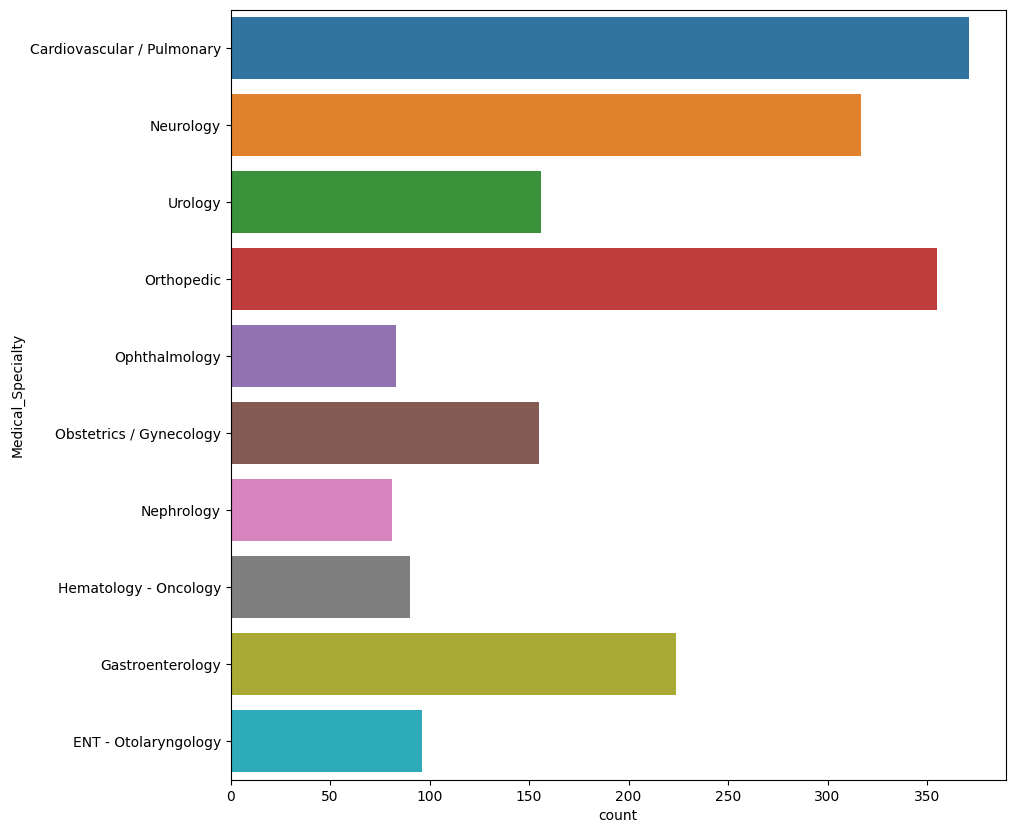

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=filt_corp['Medical_Specialty'], data = filt_corp)
plt.show()

In [ ]:
possible_labels = filt_corp.Medical_Specialty.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
print(label_dict)

filt_corp['Labels'] = filt_corp.Medical_Specialty.replace(label_dict)
filt_corp.head()

{'Cardiovascular / Pulmonary': 0, 'Neurology': 1, 'Urology': 2, 'Orthopedic': 3, 'Ophthalmology': 4, 'Obstetrics / Gynecology': 5, 'Nephrology': 6, 'Hematology - Oncology': 7, 'Gastroenterology': 8, 'ENT - Otolaryngology': 9}


Transcription  \
3   2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4   1.  The left ventricular cavity size and wall ...   
7   2-D ECHOCARDIOGRAM,Multiple views of the heart...   
9   DESCRIPTION:,1.  Normal cardiac chambers size....   
11  2-D STUDY,1. Mild aortic stenosis, widely calc...   

             Medical_Specialty  Labels  
3   Cardiovascular / Pulmonary       0  
4   Cardiovascular / Pulmonary       0  
7   Cardiovascular / Pulmonary       0  
9   Cardiovascular / Pulmonary       0  
11  Cardiovascular / Pulmonary       0

In [ ]:
X = filt_corp.drop('Labels', axis =1)
y = pd.get_dummies(filt_corp['Labels']).values

info = X.copy()
info.reset_index(inplace=True)

In [ ]:
print(X.shape)
print(y.shape)

(1928, 2)
(1928, 10)


In [ ]:
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
custom_stopwords = ['noted', 'time', 'preoperative', 'diagnosis', 'postoperative', 'well']
STOP_WORDS.update(custom_stopwords)

spy = spacy.load("en_core_web_sm")
spacy_corpus = []

for i in range(0, len(info)):
  print(i)
  transcript = spy(str(info['Transcription'][i]))
  transcript = [word.lemma_.lower().strip() for word in transcript if not word.is_stop and not word.is_punct and not word.is_digit]
  #transcript = transcript.translate(str.maketrans("", "", string.punctuation))
  transcript = ' '.join(transcript)
  spacy_corpus.append(transcript)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
spacy_corpus[10]

'voluntary sterility ,postoperative voluntary sterility ,operative procedure  bilateral vasectomy ,anesthesia  local ,indications procedure  gentleman today request voluntary sterility  option discuss voluntary sterility elect proceed bilateral vasectomy ,description procedure  patient bring operating room appropriately identify patient patient preppe drape standard surgical fashion place supine position table  0.25 marcaine epinephrine anesthetize scrotal skin  small incision right hemiscrotum  vas deferen grasp vas clamp  vas deferen skeletonize  clip proximally distally twice  cut edge fulgurate  meticulous hemostasis maintain  chromic close scrotal skin right hemiscrotum  attention turn left hemiscrotum left hemiscrotum anesthetize appropriately small incision left hemiscrotum  vas deferen isolate  skeletonize  clip proximally distally twice  cut edge fulgurate  meticulous hemostasis maintain  chromic close scrotal skin  jockstrap sterile dressing apply end case  sponge needle inst

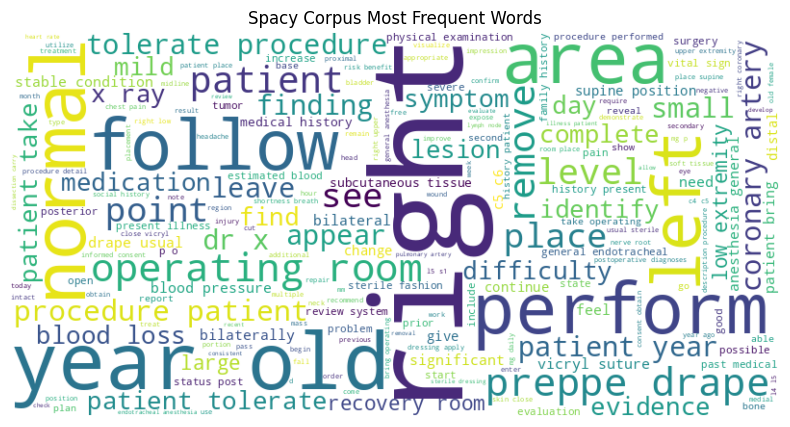

In [ ]:
# Step 2: Create a WordCloud
wordcloud = WordCloud(width=800, height=400,max_words= 200, background_color='white').generate(" ".join(spacy_corpus))

# Step 3: Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Spacy Corpus Most Frequent Words')
plt.axis('off')
plt.show()

**DEEP BELIEF NETWORK MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(spacy_corpus).toarray()

label_encoder = LabelEncoder()
labels = filt_corp['Labels']
y = label_encoder.fit_transform(labels)
num_classes = 10

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
y_train_one_hot = to_categorical(y_train_fold, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_fold, num_classes=num_classes)

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1630200   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 1635760 (6.24 MB)
Trainable params: 1635760 (6.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train_fold, y_train_one_hot, validation_data=(X_test_fold, y_test_one_hot),epochs=10, batch_size=32, verbose=1)

Epoch 1/10
45/45 [==============================] - 2s 17ms/step - loss: 2.1580 - accuracy: 0.2507 - val_loss: 1.7895 - val_accuracy: 0.4706
Epoch 2/10
45/45 [==============================] - 0s 11ms/step - loss: 1.5750 - accuracy: 0.5215 - val_loss: 1.0999 - val_accuracy: 0.8137
Epoch 3/10
45/45 [==============================] - 1s 11ms/step - loss: 0.9737 - accuracy: 0.7653 - val_loss: 0.7045 - val_accuracy: 0.8235
Epoch 4/10
45/45 [==============================] - 0s 11ms/step - loss: 0.6019 - accuracy: 0.8472 - val_loss: 0.5425 - val_accuracy: 0.8333
Epoch 5/10
45/45 [==============================] - 1s 11ms/step - loss: 0.4043 - accuracy: 0.9069 - val_loss: 0.5191 - val_accuracy: 0.8333
Epoch 6/10
45/45 [==============================] - 0s 11ms/step - loss: 0.2971 - accuracy: 0.9139 - val_loss: 0.4935 - val_accuracy: 0.8333
Epoch 7/10
45/45 [==============================] - 1s 12ms/step - loss: 0.2489 - accuracy: 0.9174 - val_loss: 0.5145 - val_accuracy: 0.8333
Epoch 8/10
45

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_one_hot, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.5148 - accuracy: 0.8627
Test Accuracy: 0.8627451062202454


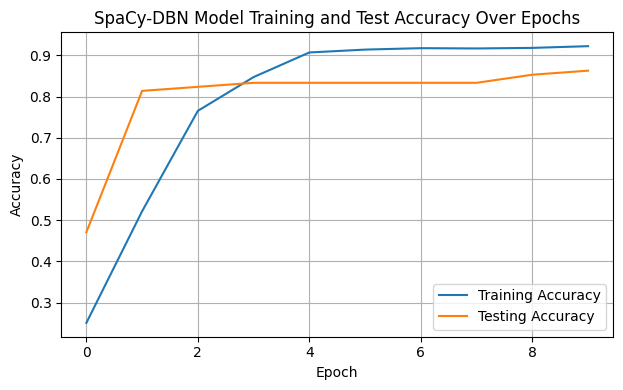

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SpaCy-DBN Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

4/4 [==============================] - 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.72      0.87      0.79        15
           2       1.00      1.00      1.00         5
           3       0.83      0.87      0.85        23
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         7
           6       0.67      0.67      0.67         6
           7       0.67      0.67      0.67         3
           8       1.00      0.83      0.91        12
           9       0.67      0.67      0.67         3

    accuracy                           0.86       102
   macro avg       0.85      0.82      0.83       102
weighted avg       0.87      0.86      0.86       102



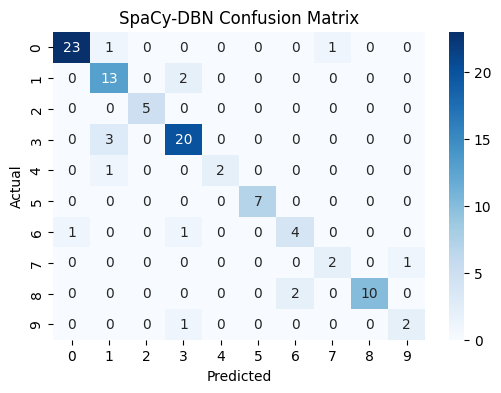

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_one_hot, axis=1)
cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SpaCy-DBN Confusion Matrix")
plt.show()

**CONVOLUTIONAL NEURAL NETWORK MODEL**

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
max_vocab = 4000
hothot = [one_hot(words, max_vocab) for words in spacy_corpus]
hothot

[[3187,
  2989,
  1791,
  59,
  2304,
  333,
  3308,
  2304,
  633,
  424,
  3891,
  3672,
  56,
  2148,
  1940,
  532,
  59,
  306,
  2424,
  2148,
  1451,
  1050,
  12,
  3308,
  3534,
  3811,
  240,
  377,
  424,
  2148,
  1451,
  3418,
  12,
  1304,
  85,
  1429,
  234,
  2148,
  3371,
  1503,
  3965,
  1684,
  3965,
  3068,
  3965,
  2651,
  3965,
  3891,
  1302,
  1050,
  471,
  562,
  3959,
  3504,
  1684,
  3068,
  2211,
  56,
  1547,
  1503,
  2651,
  2211],
 [3308,
  3534,
  1122,
  1940,
  576,
  456,
  15,
  2148,
  576,
  3970,
  59,
  3534,
  1050,
  12,
  15,
  1011,
  3462,
  3811,
  240,
  1977,
  1122,
  3292,
  2210,
  15,
  2657,
  59,
  3534,
  689,
  3024,
  1955,
  1028,
  1122,
  2271,
  75,
  1011,
  3308,
  3534,
  1050,
  12,
  765,
  3308,
  3534,
  2148,
  3179,
  2210,
  2815,
  59,
  2304,
  471,
  2210,
  3959,
  3667,
  56,
  3308,
  1099,
  15,
  3794,
  3641,
  2424,
  532,
  1099,
  532,
  306,
  15,
  2148,
  424,
  1503,
  3607,
  15,
  2148,
  130

In [ ]:
sent_len = 200
embed_vec = 50
X = filt_corp.drop('Labels', axis =1)
y = pd.get_dummies(filt_corp['Labels']).values
embed = pad_sequences(hothot, padding='pre', maxlen= sent_len)
print(len(embed))
print(embed)

1928
[[   0    0    0 ... 1503 2651 2211]
 [   0    0    0 ... 1034  820 1908]
 [   0    0    0 ...  984  102 3989]
 ...
 [3863  584  983 ... 3282 3365  121]
 [   0    0    0 ... 1080 2764 1631]
 [ 627  775 2687 ... 2148 1451   12]]


In [ ]:
X_mod = np.array(embed)
y_mod = np.array(y)
print(len(embed))
print(y.shape)
print(X_mod.shape)
print(y_mod.shape)

1928
(1928, 10)
(1928, 200)
(1928, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
model = Sequential()
model.add(Embedding(max_vocab, embed_vec, input_length=sent_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           200000    
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          32128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                      

In [ ]:
history2 = model.fit(X_train_fold, y_train_fold, validation_data=(X_test_fold, y_test_fold), epochs = 20, batch_size=64)

Epoch 1/20
23/23 [==============================] - 2s 33ms/step - loss: 2.2329 - accuracy: 0.1750 - val_loss: 2.1578 - val_accuracy: 0.1863
Epoch 2/20
23/23 [==============================] - 1s 25ms/step - loss: 2.1378 - accuracy: 0.2167 - val_loss: 2.1070 - val_accuracy: 0.1961
Epoch 3/20
23/23 [==============================] - 1s 24ms/step - loss: 2.0735 - accuracy: 0.2493 - val_loss: 2.0669 - val_accuracy: 0.3137
Epoch 4/20
23/23 [==============================] - 1s 25ms/step - loss: 1.9913 - accuracy: 0.3368 - val_loss: 1.9758 - val_accuracy: 0.3431
Epoch 5/20
23/23 [==============================] - 1s 25ms/step - loss: 1.8426 - accuracy: 0.3979 - val_loss: 1.8042 - val_accuracy: 0.4412
Epoch 6/20
23/23 [==============================] - 1s 25ms/step - loss: 1.6208 - accuracy: 0.4896 - val_loss: 1.6022 - val_accuracy: 0.5196
Epoch 7/20
23/23 [==============================] - 1s 25ms/step - loss: 1.4190 - accuracy: 0.5535 - val_loss: 1.4133 - val_accuracy: 0.5980
Epoch 8/20
23

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.8209 - accuracy: 0.7843
Test Accuracy: 0.7843137383460999


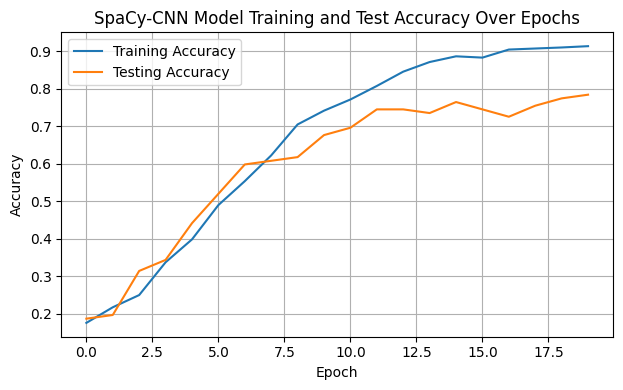

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SpaCy-CNN Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.72      0.76      0.74        17
           2       0.50      1.00      0.67         4
           3       0.88      0.79      0.83        19
           4       0.86      1.00      0.92         6
           5       0.89      0.89      0.89         9
           6       1.00      0.25      0.40         4
           7       1.00      0.17      0.29         6
           8       0.67      0.86      0.75        14
           9       1.00      0.50      0.67         4

    accuracy                           0.78       102
   macro avg       0.84      0.72      0.71       102
weighted avg       0.82      0.78      0.77       102



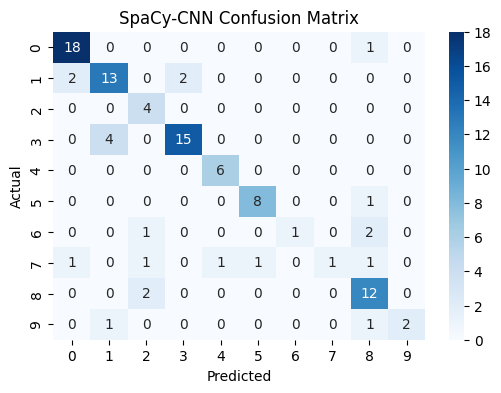

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_fold, axis=1)
cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SpaCy-CNN Confusion Matrix")
plt.show()


**LONG SHORT TERM MODEL (LSTM)**

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_vocab, embed_vec, input_length=sent_len))
model.add(LSTM(100,dropout = 0.5, recurrent_dropout=0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           200000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 261410 (1021.13 KB)
Trainable params: 261410 (1021.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
history3 = model.fit(X_train_fold, y_train_fold, validation_data=(X_test_fold, y_test_fold), epochs = 15, batch_size=64)

Epoch 1/15
23/23 [==============================] - 9s 210ms/step - loss: 2.2319 - accuracy: 0.1931 - val_loss: 2.1687 - val_accuracy: 0.1863
Epoch 2/15
23/23 [==============================] - 4s 188ms/step - loss: 2.1440 - accuracy: 0.1875 - val_loss: 2.1245 - val_accuracy: 0.2941
Epoch 3/15
23/23 [==============================] - 5s 207ms/step - loss: 2.0610 - accuracy: 0.2313 - val_loss: 1.9485 - val_accuracy: 0.3235
Epoch 4/15
23/23 [==============================] - 4s 194ms/step - loss: 1.7801 - accuracy: 0.3569 - val_loss: 1.9408 - val_accuracy: 0.2941
Epoch 5/15
23/23 [==============================] - 4s 192ms/step - loss: 1.7398 - accuracy: 0.4049 - val_loss: 1.6798 - val_accuracy: 0.3627
Epoch 6/15
23/23 [==============================] - 5s 201ms/step - loss: 1.5028 - accuracy: 0.4750 - val_loss: 1.5569 - val_accuracy: 0.4608
Epoch 7/15
23/23 [==============================] - 4s 192ms/step - loss: 1.2851 - accuracy: 0.5285 - val_loss: 1.4716 - val_accuracy: 0.4412
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 31ms/step - loss: 1.2635 - accuracy: 0.6176
Test Accuracy: 0.6176470518112183


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SpaCy-LSTM Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_fold, axis=1)

cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SpaCy-LSTM Confusion Matrix")
plt.show()


4/4 [==============================] - 0s 30ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.61      0.65      0.63        17
           2       0.50      0.75      0.60         4
           3       0.84      0.84      0.84        19
           4       0.71      0.83      0.77         6
           5       0.38      0.56      0.45         9
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6
           8       0.53      0.57      0.55        14
           9       0.50      0.25      0.33         4

    accuracy                           0.62       102
   macro avg       0.48      0.52      0.49       102
weighted avg       0.58      0.62      0.59       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MULTILAYER PERCEPTRON MODEL**

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout

model = Sequential()
model.add(Embedding(max_vocab, embed_vec, input_length=sent_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 50)           200000    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1280128   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 1489034 (5.68 MB)
Trainable params: 1489

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
history4 = model.fit(X_train_fold, y_train_fold, validation_data=(X_test_fold, y_test_fold), epochs = 15, batch_size=64)

Epoch 1/15
23/23 [==============================] - 1s 22ms/step - loss: 2.2667 - accuracy: 0.1854 - val_loss: 2.1898 - val_accuracy: 0.2451
Epoch 2/15
23/23 [==============================] - 0s 15ms/step - loss: 2.0300 - accuracy: 0.3514 - val_loss: 2.0380 - val_accuracy: 0.3039
Epoch 3/15
23/23 [==============================] - 0s 14ms/step - loss: 1.5554 - accuracy: 0.4590 - val_loss: 1.6822 - val_accuracy: 0.5000
Epoch 4/15
23/23 [==============================] - 0s 13ms/step - loss: 0.9901 - accuracy: 0.7007 - val_loss: 1.4430 - val_accuracy: 0.5392
Epoch 5/15
23/23 [==============================] - 0s 13ms/step - loss: 0.5918 - accuracy: 0.8361 - val_loss: 1.4463 - val_accuracy: 0.5882
Epoch 6/15
23/23 [==============================] - 0s 13ms/step - loss: 0.3532 - accuracy: 0.9083 - val_loss: 1.4275 - val_accuracy: 0.5882
Epoch 7/15
23/23 [==============================] - 0s 13ms/step - loss: 0.2662 - accuracy: 0.9243 - val_loss: 1.3491 - val_accuracy: 0.6667
Epoch 8/15
23

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 1.4668 - accuracy: 0.6667
Test Accuracy: 0.6666666865348816


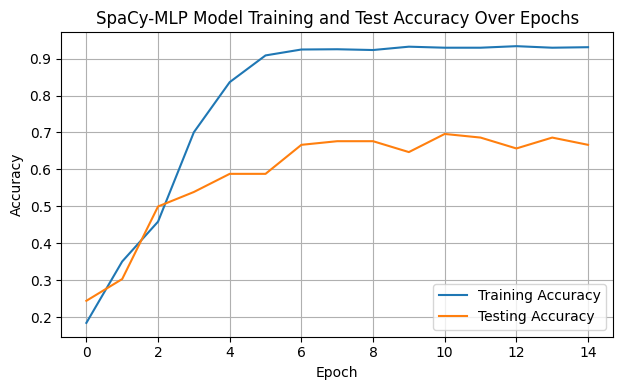

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SpaCy-MLP Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        19
           1       0.75      0.71      0.73        17
           2       0.17      0.25      0.20         4
           3       0.72      0.95      0.82        19
           4       0.67      0.67      0.67         6
           5       0.75      0.33      0.46         9
           6       0.00      0.00      0.00         4
           7       0.50      0.17      0.25         6
           8       0.69      0.64      0.67        14
           9       1.00      0.25      0.40         4

    accuracy                           0.67       102
   macro avg       0.59      0.50      0.50       102
weighted avg       0.66      0.67      0.63       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


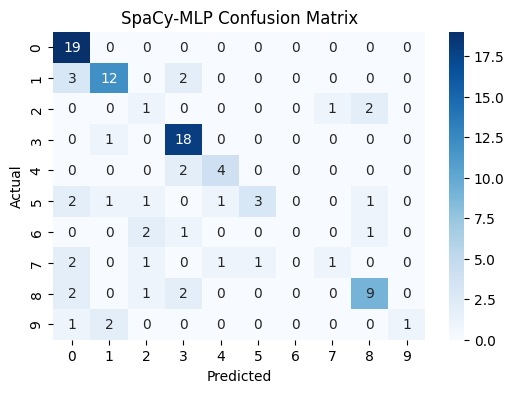

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_fold, axis=1)

cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SpaCy-MLP Confusion Matrix")
plt.show()
